In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt
%matplotlib inline

As per the [Wolrd Health Organization](https://www.who.int/health-topics/coronavirus), Coron Viruses (CoV) are a family of viruses that cause illnesses ranging from common to sever diseases. The Novel CoronoVirus(nCoV or COVID-19) is a new strain that had not been previously identified in the humans. The World Health Organization first reported the outbreak of Corona Virus Disease (COVID-19) on Decemeber 31, 2019. You can follow the updates on COVID-19 outbreak from [WHO](https://www.who.int/emergencies/diseases/novel-coronavirus-2019).

Today we'll analyze the COVID-19 outbreak around the world. How is the outbreak spreading, and how are the infected people recovering around the world. 

## Outbreak analysis
Let's start the overall analysis of how the disease spread over the days.

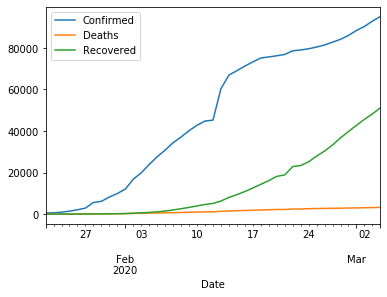

In [6]:
# Load the dataset
outbreak = pd.read_csv('../data/covid_19_data.csv')

# Data cleaning
# Rename the columns for easy use
outbreak = outbreak.rename(columns={'Country/Region':'Country','ObservationDate':'Date'})

# Combine the counts from China and change the Date datatype to datetime.
outbreak.Country = outbreak.Country.str.replace('Mainland China','China')
outbreak.Date = pd.to_datetime(outbreak.Date)

outbreakOverall = outbreak.groupby('Date')['Confirmed','Deaths','Recovered'].sum()
outbreakOverall.reset_index(inplace=True)

outbreakOverall.plot(x='Date',y=['Confirmed','Deaths','Recovered'],kind='line')

As can be seen from the above chart, the disease started spreading fast since 1st Feb 2020. There was a huge burst of disease on Feb 13th. However, since then, the infected people also started recovering at a fast rate. Let's try and get a sense of the recovery rate.

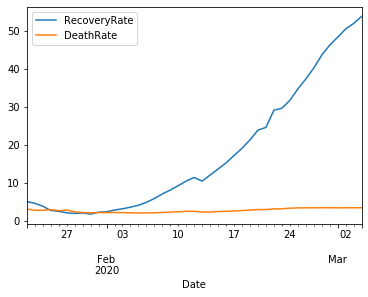

In [7]:
outbreakOverall['RecoveryRate'] = outbreakOverall.Recovered * 100.0 / outbreakOverall.Confirmed
outbreakOverall['DeathRate'] = outbreakOverall.Deaths * 100.0 / outbreakOverall.Confirmed

outbreakOverall.plot(x='Date',y=['RecoveryRate', 'DeathRate'],kind='line')

As can be seen from the above chart, the Recovery rate, amongst all infected, started increasing since Feb 13th. As of March 7th, the recovery rate is 55% and is recovering exponentially. This is great news! 

## Speed of COVID-19 outbreak and recovery
Let's try and analyze how fast is the disease spreading and how fast the people are recovering!


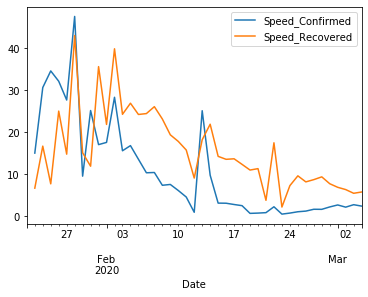

In [8]:
# Compute the first degree of differences
outbreakOverall['DeltaConfirmed'] = outbreakOverall.Confirmed.diff()
outbreakOverall['DeltaRecovered'] = outbreakOverall.Recovered.diff()
outbreakOverall['DeltaDeaths']    = outbreakOverall.Deaths.diff()


# Compute the speed of spread, recovery and death
outbreakOverall['Speed_Confirmed'] = outbreakOverall.DeltaConfirmed * 100.0 / outbreakOverall.Confirmed
outbreakOverall['Speed_Recovered'] = outbreakOverall.DeltaRecovered * 100.0 / outbreakOverall.Recovered
outbreakOverall['Speed_Deaths'] = outbreakOverall.DeltaDeaths * 100.0 / outbreakOverall.Deaths

outbreakOverall.plot(x='Date',y=['Speed_Confirmed','Speed_Recovered'],kind='line')

The COVID-19 was spreading at close to 50% each day at the end of Jan. **Since Jan 31st, the speed of recovery has overtaken the speed with which the disease was spreading.** 

Now that we are hopeful that the infected people are recovering faster, let's try and analyze the outbreak of the disease by each country.

In [16]:
outbreakByCountry = outbreak.groupby(['Date','Country'])['Confirmed','Deaths','Recovered'].sum()
outbreakByCountry.reset_index(inplace=True)
outbreakByCountry.tail()

,Date,Country,Confirmed,Deaths,Recovered
1457,2020-03-04,UK,85.0,0.0,8.0
1458,2020-03-04,US,153.0,11.0,8.0
1459,2020-03-04,Ukraine,1.0,0.0,0.0
1460,2020-03-04,United Arab Emirates,27.0,0.0,5.0
1461,2020-03-04,Vietnam,16.0,0.0,16.0


In [18]:
latestByCountry = outbreakByCountry[outbreakByCountry.Date == '2020-03-04'].sort_values('Confirmed',ascending=False)

latestByCountry['ConfirmedPerc'] = latestByCountry.Confirmed * 100/ latestByCountry.Confirmed.sum()
latestByCountry.head(10)

,Date,Country,Confirmed,Deaths,Recovered,ConfirmedPerc
1391,2020-03-04,China,80271.0,2981.0,49955.0,84.385644
1449,2020-03-04,South Korea,5621.0,35.0,41.0,5.909129
1415,2020-03-04,Italy,3089.0,107.0,276.0,3.247340
1411,2020-03-04,Iran,2922.0,92.0,552.0,3.071780
1436,2020-03-04,Others,706.0,6.0,10.0,0.742189
1416,2020-03-04,Japan,331.0,6.0,43.0,0.347967
1401,2020-03-04,France,285.0,4.0,12.0,0.299609
1403,2020-03-04,Germany,262.0,0.0,16.0,0.275430
1450,2020-03-04,Spain,222.0,2.0,2.0,0.233380
1458,2020-03-04,US,153.0,11.0,8.0,0.160843


As on March 9th, China had the largest impact with 71% Confirmed amongst over world with Italy(8%), South Korea(6.5%) and Iran(6.3%) following. 

There will be more insights coming up. Please follow the notebook for updates. Also, please share if you are looking for anything specific that could provide better insights into the COVID-19 outbreak. 